# corss_entropy
# 数据是一维的（二元交叉熵损失）
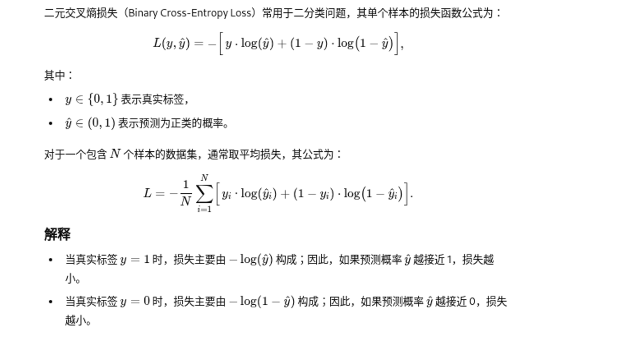
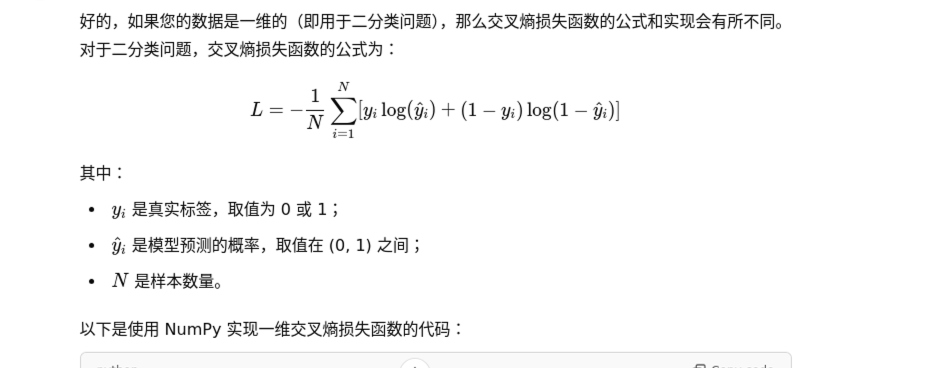

In [11]:
import torch
import torch.nn.functional as F
import numpy as np

# 真实标签（0 或 1）
y_true = np.array([1, 0, 1, 1, 0])

# 模型预测的概率
y_pred = np.array([0.9, 0.2, 0.8, 0.7, 0.1])

y_true_tensor = torch.tensor(y_true, dtype=torch.float16) 
y_pred_tensor = torch.tensor(y_pred, dtype=torch.float16) 

# 计算二元交叉熵损失
loss = F.binary_cross_entropy(y_pred_tensor, y_true_tensor)
print("交叉熵损失：", loss.item())

交叉熵损失： 0.2027587890625


# 多维
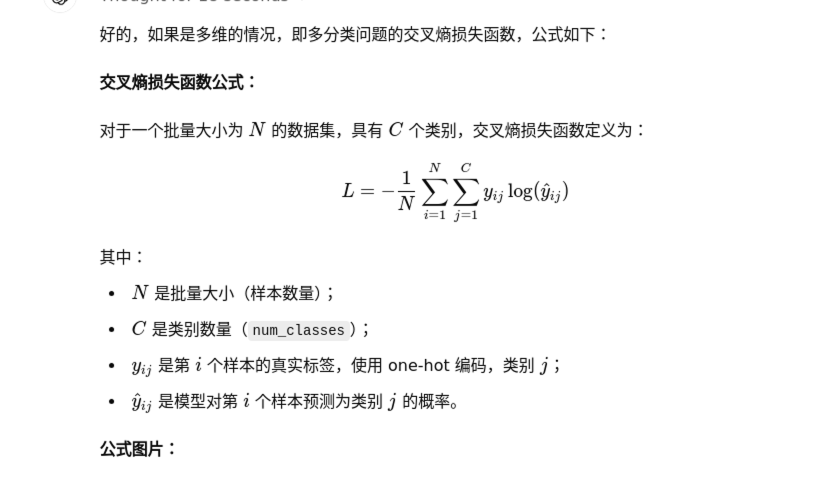

In [12]:
import torch
import torch.nn.functional as F

# 真实标签（整数标签，不是 one-hot 编码）
y_true = torch.tensor([0, 1, 2])  # 三个样本分别属于类别 0, 1, 2

# 模型预测的 logits（未经过 softmax）
y_pred = torch.tensor([[ 0.0000, -2.0794, -2.0794],
                       [-1.2528,  0.0000, -1.9459],
                       [-1.9459, -1.2528,  0.0000]])

# 计算交叉熵损失
loss = F.cross_entropy(y_pred, y_true)
print("Cross Entropy Loss:", loss.item())

Cross Entropy Loss: 0.31216299533843994


In [13]:
import torch
import torch.nn.functional as F

# 真实标签（整数标签，不是 one-hot 编码）
y_true = torch.tensor([0, 1, 2])  # 三个样本分别属于类别 0, 1, 2

# 已经经过 softmax 的预测概率
y_pred = torch.tensor([
    [0.8, 0.1, 0.1],  # 第一个样本的预测概率
    [0.2, 0.7, 0.1],  # 第二个样本的预测概率
    [0.1, 0.2, 0.7]   # 第三个样本的预测概率
])

# 使用 log 概率并计算负对数似然损失
loss = F.nll_loss(torch.log(y_pred), y_true)
print("Cross Entropy Loss with Softmax Probabilities:", loss.item())

Cross Entropy Loss with Softmax Probabilities: 0.3121644854545593


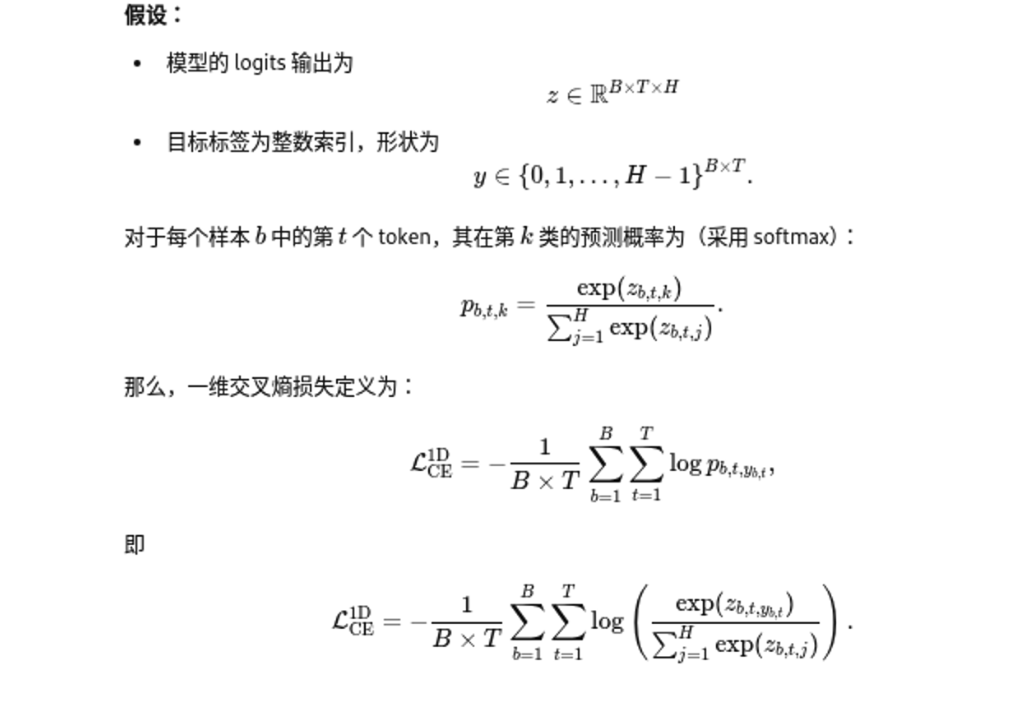

In [14]:
import torch
import torch.nn.functional as F

# Example parameters:
# B: batch size, T: sequence length, H: number of classes (hidden_dim)
B, T, H = 2, 3, 5

# Randomly generate logits with shape (B, T, H)
logits = torch.randn(B, T, H)

# Generate target labels as class indices with shape (B, T)
targets = torch.randint(0, H, (B, T))

# ------------------------------
# 1. Using PyTorch built-in function
# ------------------------------

# nn.CrossEntropyLoss expects the input to be of shape (N, C) where N = B * T,
# and the target to be of shape (N,)
loss_fn = torch.nn.CrossEntropyLoss()
# Flatten logits from (B, T, H) to (B*T, H) and targets from (B, T) to (B*T)
loss_builtin = loss_fn(logits.view(-1, H), targets.view(-1))
print("1D CrossEntropyLoss (built-in):", loss_builtin.item())


1D CrossEntropyLoss (built-in): 2.1349971294403076
